Desarrollar un modelo de regresión que permita predecir el
precio por metro cuadrado de una propiedad. El objetivo final es que el
modelo que desarrollen sea utilizado como tasador automático a ser
aplicados a las próximas propiedades que sean comercializadas por la
empresa.

1) Efectuar una limpieza del dataset provisto. Particularmente, deberá
diseñar estrategias para lidiar con los datos perdidos en ciertas variables.

In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (8, 6), 'figure.dpi': 120})
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('ds_properati.csv')
df.shape
# df.duplicated()

(121220, 26)

In [3]:
df.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [4]:
df.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [5]:
df.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [6]:
df.count()

Unnamed: 0                    121220
operation                     121220
property_type                 121220
place_name                    121197
place_with_parent_names       121220
country_name                  121220
state_name                    121220
geonames_id                   102503
lat-lon                        69670
lat                            69670
lon                            69670
price                         100810
currency                      100809
price_aprox_local_currency    100810
price_aprox_usd               100810
surface_total_in_m2            81892
surface_covered_in_m2         101313
price_usd_per_m2               68617
price_per_m2                   87658
floor                           7899
rooms                          47390
expenses                       14262
properati_url                 121220
description                   121218
title                         121220
image_thumbnail               118108
dtype: int64

In [7]:
type(df)

pandas.core.frame.DataFrame

2) Realizar un análisis descriptivo de las principales variables.

In [8]:
# Analizando los missings por columnas
df.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

Se observa que 'surface_total', 'surface_covered' tienen la mayor cantidad de valores faltantes.

In [9]:
# Elimino missings
df = df.dropna()

In [10]:
# Verifico que no tengo missings
df.isnull().sum()

Unnamed: 0                    0
operation                     0
property_type                 0
place_name                    0
place_with_parent_names       0
country_name                  0
state_name                    0
geonames_id                   0
lat-lon                       0
lat                           0
lon                           0
price                         0
currency                      0
price_aprox_local_currency    0
price_aprox_usd               0
surface_total_in_m2           0
surface_covered_in_m2         0
price_usd_per_m2              0
price_per_m2                  0
floor                         0
rooms                         0
expenses                      0
properati_url                 0
description                   0
title                         0
image_thumbnail               0
dtype: int64

In [11]:
df.shape

(598, 26)

3) Crear nuevas columnas a partir de las características dadas que puedan
tener valor predictivo.

In [39]:
# Rename de columnas vacías:
df.rename( columns={"Unnamed: 0" :'algo'}, inplace=True)

In [46]:
# Elimino columnas innecesarias
df_Filtrado = df.drop(['algo', 'operation', 'country_name', 'currency', 'geonames_id', 'lat-lon', 'lat', 'lon', 'price_aprox_local_currency', 'price_per_m2', 'properati_url', 'description', 'title', 'image_thumbnail', 'surface_covered_in_m2', 'property_type', 'place_name', 'place_with_parent_names', 'state_name', 'price_aprox_usd', 'expenses'], axis='columns')
df_Filtrado.head(2)

,price,surface_total_in_m2,price_usd_per_m2,floor,rooms
96,54000.0,75.0,720.000000,3.0,2.0
691,152000.0,52.0,2923.076923,6.0,2.0


In [57]:
df_Filtrado.columns

Index(['price', 'surface_total_in_m2', 'price_usd_per_m2', 'floor', 'rooms'], dtype='object')

In [ ]:
# Verifico todas la operaciones son ventas: sns.countplot(x='place_name', data=df)  

<AxesSubplot:>

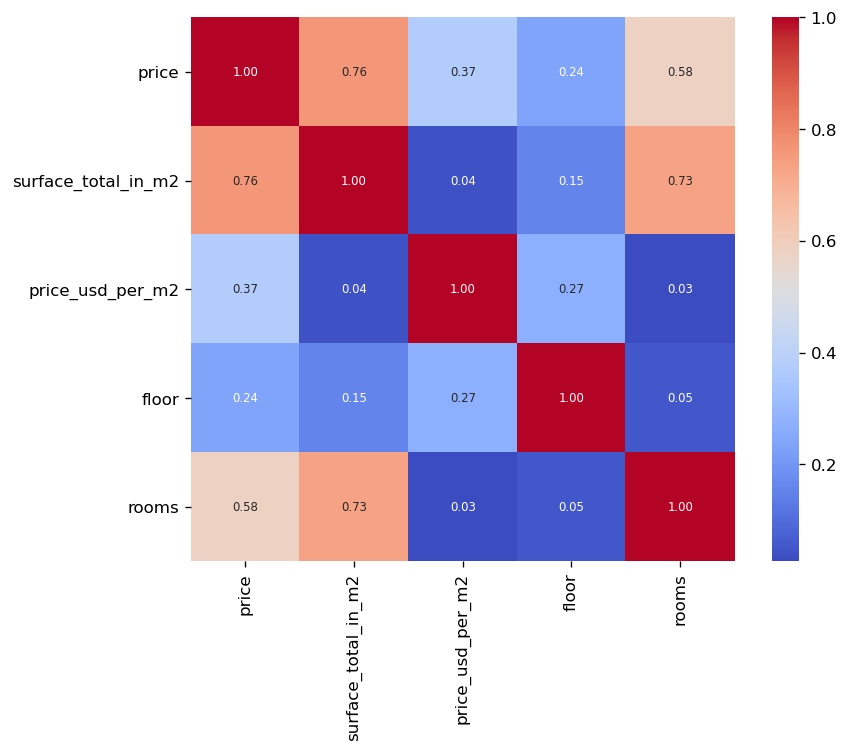

In [50]:
corr = df_Filtrado.corr()
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size': 7}, cmap = 'coolwarm')

### Predecir el costo de un inmueble a partir de sus características: m2, nros baños, pisos.

In [58]:
# Aplicando el modelo de regresión 
# Seleccionamos las variables predictoras
X = df_Filtrado[["surface_total_in_m2", 'price_usd_per_m2', "floor", "rooms"]] 

# Defino el Target
y = df_Filtrado.price

# Separo en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Generamos el Modelo de Regresión Lineal
linear_model = LinearRegression()

# Fiteo el modelo
linear_model.fit(X_train, y_train)

LinearRegression()

In [59]:
#Evaluamos el modelo
for i, model in enumerate ([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict (X_test)

    print(f'Modelo benchmark: {modelo[i]}')
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f'Raiz del error cuadratico medio en train: {rmse_train}')
    print(f'Raiz del error cuadratico medio en test: {rmse_test}')

Modelo benchmark: Regresion lineal
Raiz del error cuadratico medio en train: 85607.27879645511
Raiz del error cuadratico medio en test: 30759.54976636864


In [65]:
new_data = pd.DataFrame({'surface_total_in_m2': [100], 'price_usd_per_m2': [5000], 'floor': [3], 'rooms': [2]})
prediction = model.predict(new_data)
print("Prediction:", prediction[0])


Prediction: 418000.0


In [78]:
dato_filtrado = df[(df.surface_total_in_m2 >= 100)& (df.price_usd_per_m2 <= 5000)& (df.floor <= 3) & (df.rooms <=2 )]
dato_filtrado

,algo,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
56086,56086,sell,apartment,Once,|Argentina|Capital Federal|Once|,Argentina,Capital Federal,3430291.0,"-34.6045117,-58.396785",-34.604512,...,45.0,925.925926,3333.333333,3.0,2.0,2200.0,http://www.properati.com.ar/19q6l_venta_depart...,"Venta de Departamento 2 AMBIENTES en Once, Cap...",DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/3/agIxZNeYZ-UOhc...


## Otros Modelos:

In [60]:
# Modelo de árbol de decisión y de vecinos cercanos
# Creamos los modelos
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

# Realizamos la prediccion y calculamos el RMSE de los modelos generados
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)    
    print(f'Modelo: {modelos[i]}')

Modelo: Árbol de Decisión
Modelo: Vecinos más cercanos


In [61]:
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))  
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 82821.82452793456
Raíz del error cuadrático medio en Test: 65410.456342175654


In [63]:
# Modelo de Clasificación
# Separo 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 
#Punto 11: Creamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) 
#Punto 12 - Entrenamos el modelo
tree.fit(X_train,y_train) 
#Punto 13 - Prediccion en Train
y_train_pred = tree.predict(X_train) 
#Prediccion en Test
y_test_pred = tree.predict(X_test) 
#Punto 14: Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Porcentaje de aciertos sobre el set de entrenamiento:', train_accuracy)
print('Porcentaje de aciertos sobre el set de evaluación:',test_accuracy)


Porcentaje de aciertos sobre el set de entrenamiento: 0.07655502392344497
Porcentaje de aciertos sobre el set de evaluación: 0.06111111111111111


c:\Users\n_sar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


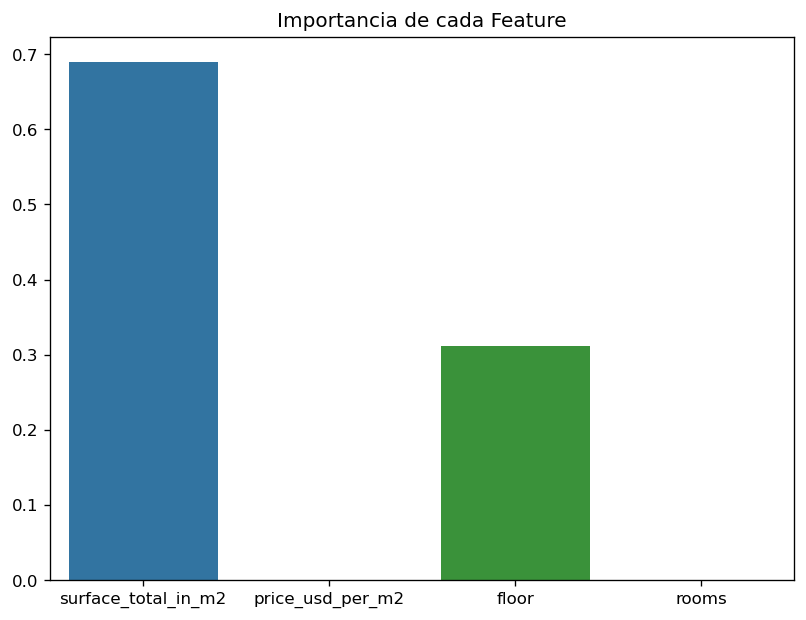

In [64]:
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()